# A tutorial for editing DEM using hydro_raster

Authors: Xiaodong Ming, Xilin Xia

In [1]:
# load data
from hydro_raster.Raster import Raster
from hydro_raster import get_sample_data
from hydro_raster.grid_show import plot_shape_file
tif_file_name = get_sample_data('tif')
dem_obj = Raster(tif_file_name)
shp_file_name = get_sample_data('shp')

## plot maps: nomral map and ranked map

[ 0.         10.         20.         30.         40.         50.
 66.62203979]


(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

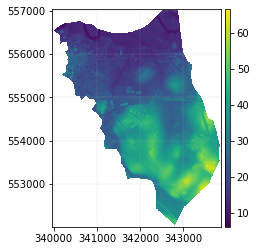

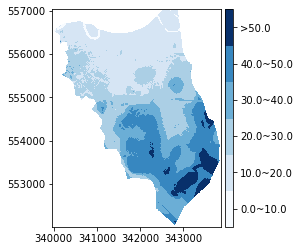

In [2]:
fig, ax = dem_obj.mapshow()
dem_obj.rankshow(breaks=[0, 10, 20, 30, 40, 50])

clip raster

In [3]:
clip_extent = (340761, 341528, 554668, 555682) # left, right, bottom, top
dem_small = dem_obj.rect_clip(clip_extent) # raster can be cutted by a shapfile as well using clip function

## plot shapefile

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

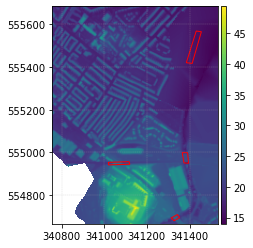

In [4]:
fig, ax = dem_small.mapshow()
plot_shape_file(shp_file_name, ax=ax, edgecolor='r', linewidth=1)

## Edit DEM values based on shapefiles

a) Rasterize polygons on a raster and return an index array with the same dimension of the raster array

b) Change raster cell values within the polygons by adding a fixed value, values can also be changed based on the attributes of each shapefile features

In [5]:
shp_file_name = get_sample_data('shp')
index_array = dem_small.rasterize(shp_file_name)
dem_obj_new = dem_small.duplicate()
add_value = 20
dem_obj_new.array[index_array] = dem_small.array[index_array]+add_value

Show the edited raster with the shapefile polygons

(<Figure size 1440x720 with 4 Axes>, <AxesSubplot:>)

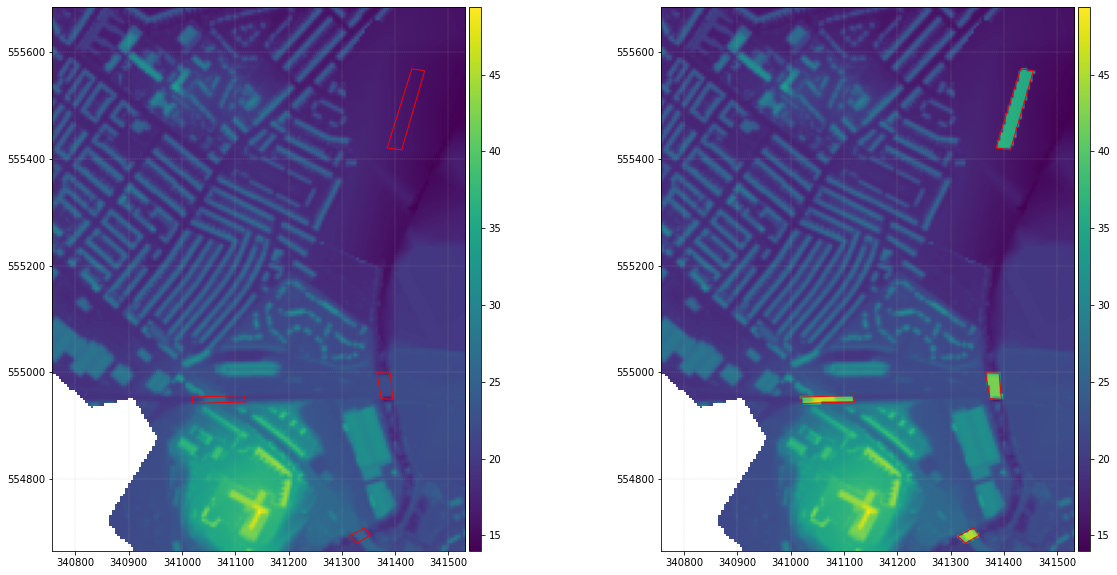

In [6]:
import matplotlib.pyplot as plt
from hydro_raster.grid_show import plot_shape_file
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
dem_small.mapshow(ax=ax[0])
plot_shape_file(shp_file_name, ax=ax[0], edgecolor='r', linewidth=1)
dem_obj_new.mapshow(ax=ax[1])
plot_shape_file(shp_file_name, ax=ax[1], edgecolor='r', linewidth=1)

## Edit DEM based on an attribute of shapefile features

In [7]:
import numpy as np
# this return a value array from the given attribute value of the shapefile
# the array has the same shape with the DEM array
# all pixels outside shapefile polygons are assigned as np.nan
# pixels inside shapefile polygons are assigned values from the attribute value of each polygon

value_array = dem_small.rasterize(shp_file_name, attr_name='id') 
#showing what the values are
value_unique = value_array[~np.isnan(value_array)]
value_unique = np.unique(value_unique)
print(value_unique) # show all 'id' values in the shapefile
# dig a pond with a depth given by the id values
dem_new = dem_small.duplicate()
value_array[np.isnan(value_array)] = 0 
dem_new.array = dem_small.array-value_array*2 # reduce DEM values according to attribute value

[2. 4. 5. 9.]


(<Figure size 1080x720 with 4 Axes>, <AxesSubplot:>)

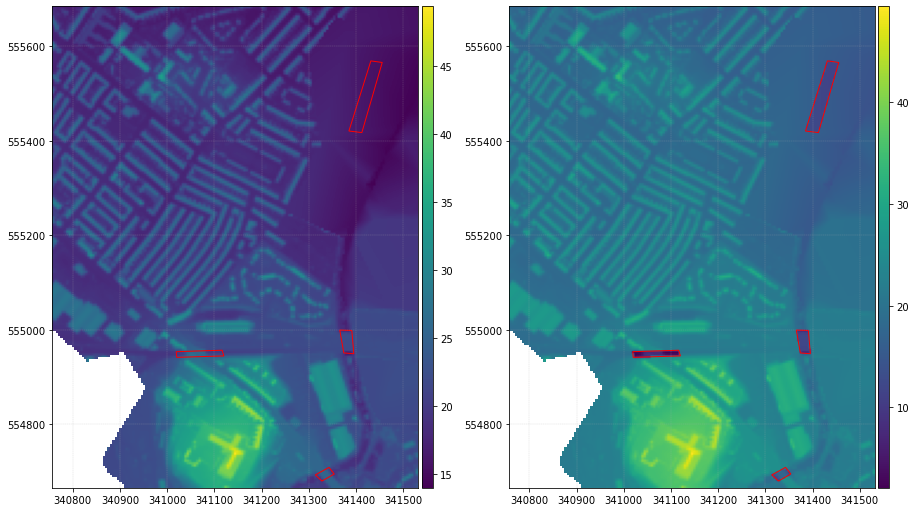

In [8]:
# show edited DEM by adding values of attribute of shapefile 
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
dem_small.mapshow(ax=ax[0])
plot_shape_file(shp_file_name, ax=ax[0], edgecolor='r', linewidth=1)
dem_new.mapshow(ax=ax[1])
plot_shape_file(shp_file_name, ax=ax[1], edgecolor='r', linewidth=1)